<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Linear_Regression_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SKLearn and StatsModel Implementation of Linear regression

#### Let's Download the Dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 238MB/s]


In [32]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [44]:
y=df['selling_price']
X=df.drop('selling_price', axis=1)

In [59]:
# split and scale features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler() # mean 0 and standard deviation of 1
X_train = scaler.fit_transform(X_train) # learn parameters and transform/convert

In [60]:
X_test = scaler.transform(X_test) # convert using parameters learnt from Training Data

#### Implement standard scaler from scratch

### SkLearn Linear Regression Model

In [48]:
# import and fit
from sklearn.linear_model import LinearRegression

sklr = LinearRegression()
sklr

LinearRegression()

In [49]:
sklr.fit(X_train,y_train)

LinearRegression()

In [50]:
# r2_score
sklr.score(X_train,y_train)

0.9413263952873979

In [68]:
sklr.coef_ # w vector

array([ 0.06592759, -0.01687916, -0.0498347 ,  0.03068838,  0.03021315,
       -0.06592759,  0.06069254,  0.79072799, -0.01786213, -0.00312257,
        0.01291355,  0.01548967,  0.0022856 , -0.02384281, -0.01358223,
       -0.02640594, -0.03590246])

In [69]:
len(sklr.coef_)

17

In [70]:
sklr.intercept_ # wo

-0.00042933171296637043

In [51]:
# predict
y_pred=sklr.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 1.43769826, -0.84753355, -0.27929008, ..., -1.00875084,
        0.64850134, -0.57557886])

In [52]:
y_pred.shape

(3964,)

In [53]:
X_test.shape

(3964, 17)

In [55]:
y_test.shape # actual values from dataset

(3964,)

In [57]:
# metrics r2_score
from sklearn.metrics import r2_score

test_r2_score= r2_score(y_test, y_pred)
test_r2_score

0.9455485525562599

In [63]:
X_test.shape[1]

17

In [64]:
def adj_r2(r2,n,k):
    return 1 - (((1-r2)*(n-1))/(n-k-1))

adj_r2(test_r2_score,X_test.shape[0],X_test.shape[1])

0.9453139669996092

### statsmodels Linear Regression: OLS

In [66]:
import statsmodels.api as sm


X_train, X_test, y_train, y_test

In [71]:
X_train = sm.add_constant(X_train) # to include and learn bias

lr_sm=sm.OLS(y_train,X_train)

In [72]:
fitted_model =  lr_sm.fit() # triggers the training process

In [74]:
# detailed summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:35:28   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

- AIC, BIC, and F-Stats

In [76]:
X_test= sm.add_constant(X_test)
sm_pred=fitted_model.predict(X_test)
sm_pred

array([ 1.43903205, -0.84803021, -0.28007228, ..., -1.00943898,
        0.64939771, -0.57643752])

In [77]:
# metrics r2_score
from sklearn.metrics import r2_score

test_r2_score= r2_score(y_test, sm_pred)
test_r2_score

0.9455454484627914

In [ ]:
#0.9455485525562599

### Assumption of Linearity and No Multi-Collinearity

In [ ]:
### Correlation 1 to 1

In [78]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [79]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.390667,-0.100739,-0.314927,0.652296,0.770390,-0.390667,0.738939,0.965051,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.390667,1.000000,-0.310288,0.262772,-0.054552,0.074124,-1.000000,-0.009793,0.335715,-0.017124,0.063389,0.026316,0.004328,-0.072595,-0.025883,-0.108357,-0.002936,0.023967
km_driven,-0.100739,-0.310288,1.000000,-0.090059,0.169491,0.007457,0.310288,0.007530,-0.072604,0.091550,-0.049455,0.249679,-0.002327,0.014153,-0.249359,0.084569,-0.136180,0.151401
mileage,-0.314927,0.262772,-0.090059,1.000000,-0.586985,-0.473775,-0.262772,-0.362006,-0.321297,0.069013,0.027321,0.108808,0.228299,-0.023325,-0.159073,0.263190,0.371743,-0.379429
engine,0.652296,-0.054552,0.169491,-0.586985,1.000000,0.791340,0.054552,0.589685,0.662828,-0.113243,-0.051005,0.453970,-0.001711,-0.049141,-0.425312,-0.368639,-0.517424,0.515238
max_power,0.770390,0.074124,0.007457,-0.473775,0.791340,1.000000,-0.074124,0.711360,0.785750,-0.195152,-0.031343,0.261586,-0.002934,-0.052945,-0.231222,-0.543705,-0.225431,0.194063
age,-0.390667,-1.000000,0.310288,-0.262772,0.054552,-0.074124,1.000000,0.009793,-0.335715,0.017124,-0.063389,-0.026316,-0.004328,0.072595,0.025883,0.108357,0.002936,-0.023967
make,0.738939,-0.009793,0.007530,-0.362006,0.589685,0.711360,0.009793,1.000000,0.761092,-0.192484,-0.031896,0.245333,0.008518,-0.024486,-0.229727,-0.563811,-0.105414,0.073579
model,0.965051,0.335715,-0.072604,-0.321297,0.662828,0.785750,-0.335715,0.761092,1.000000,-0.194221,-0.022854,0.343207,0.019431,-0.054060,-0.321073,-0.596334,-0.235237,0.223754
Individual,-0.201808,-0.017124,0.091550,0.069013,-0.113243,-0.195152,0.017124,-0.192484,-0.194221,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


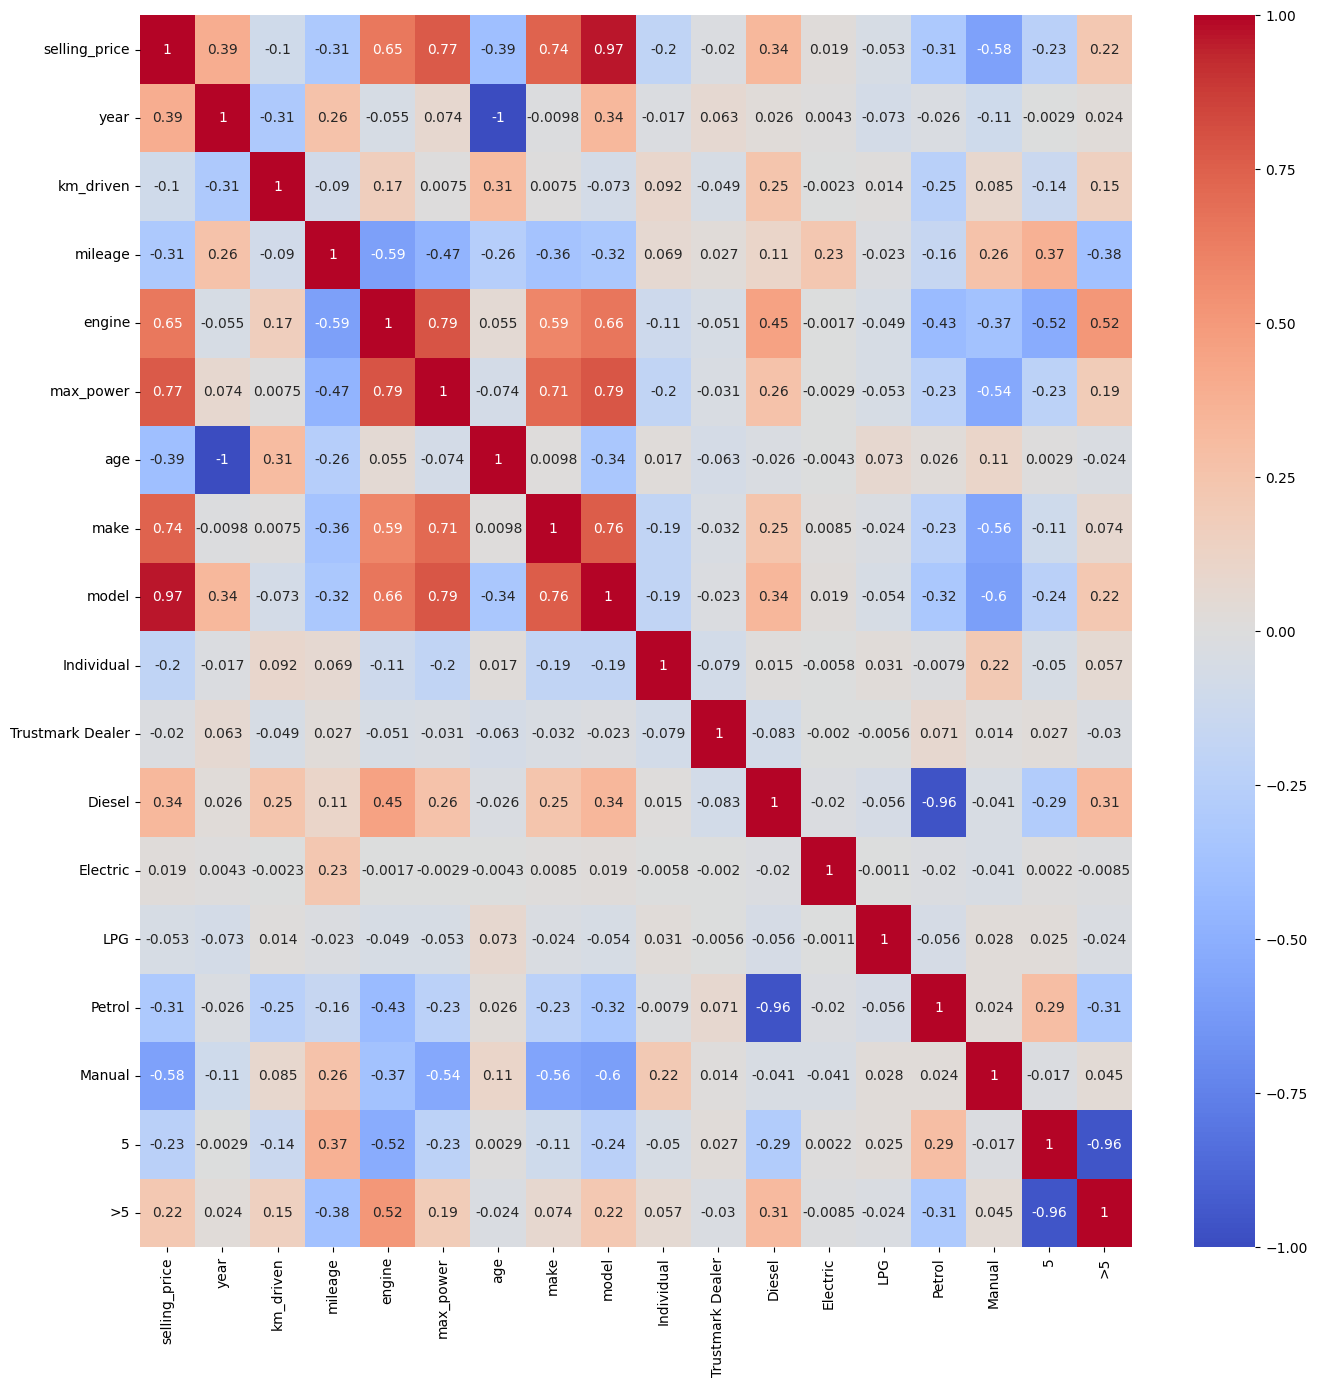

In [83]:
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)
plt.show()

### VIF

In [84]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:38:35   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns) # add values and columns to dataframe
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.78
4,max_power,5.00
2,mileage,3.22


#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

In [86]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:41:50   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

In [87]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:42:19   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

Let's now keep on removing features till we
- either have a feature with vif<5

or
- have the model's adj. r2 score go below 0.85

In [88]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450336
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [89]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:43:40   Log-Likelihood:                -8348.2
No. Observations:               15856   AIC:                         1.672e+04
Df Residuals:                   15843   BIC:                         

3. Errors must be normally distributed

In [90]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [91]:
y_train.shape

(15856,)

In [92]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

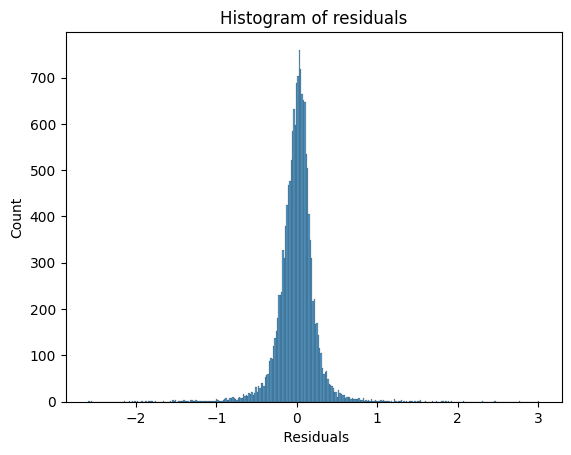

In [93]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526061177253723

Closer the value to 1, more is the normality.

In this case, a value of 0.85 denotes a high level of normality for the error distribuiton

Lets implement heteroskedasticity in Cars24

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

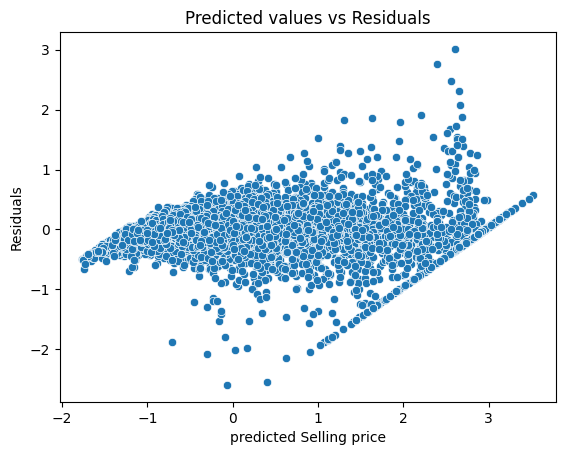

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

### Using Goldfeld Quandt Test to check homoskedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 1.0084600947540285), ('p-value', 0.35392832073679753)]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.353 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

How train test split manage to include all unique values of features, eg lets say we were already using emission standard as one of the feature but recently BS7 gets launched and we have very little labled data against BS7, while training how to ensure these rows are part of training

In [95]:
### stratified sampling:

### train: 0.80
### test: .20
## Column value: Engine Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=X["year"])


ValueError: ignored

In [97]:
X.year.value_counts()

 0.762867    2645
 0.450030    2586
 0.137194    2426
 1.075704    2157
-0.175643    1942
-0.488480    1770
-0.801317    1549
 1.388540    1228
-1.114153    1086
-1.426990     837
-1.739827     430
-2.052663     364
 1.701377     232
-2.365500     232
-2.678337     159
-2.991173      59
-3.304010      39
-3.616847      22
-3.929684      12
-4.555357      11
-4.868194      11
-4.242520       9
-5.181030       6
 2.014214       5
-5.493867       1
-7.058051       1
-5.806704       1
Name: year, dtype: int64

In [98]:

test_r2_score= r2_score(y_test, y_pred)
test_r2_score

0.9455485525562599

In [99]:
test_r2_score= r2_score(y_pred, y_test )
test_r2_score

0.9426305415728954

 We have converted Car Names into numerical. How to find Car name when Numerical is given?

In [ ]:
# "suzuki"

{"Suzuki":1,"Maruti":2.0}
## extracted all suzukis, calculated mean selling price and replace

- one hot encoding for brand name replacement